<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Synthetic_Biology_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1: Microbial and Genetic Foundations

Goals: Build a solid grounding in microbiology and molecular genetics. Learn what DNA, genes and genomes are in bacteria, and review the central dogma (DNA → RNA → protein)​
en.wikipedia.org

. Understand that bacteria are unicellular prokaryotes (no nucleus) with circular chromosomes​
en.wikipedia.org
​
en.wikipedia.org

. Set up your Python environment (Google Colab) and install basic bioinformatics libraries (biopython, etc.).
Key Concepts: DNA structure, genes and operons in bacteria, transcription and translation (central dogma)​

en.wikipedia.org
​
en.wikipedia.org

. Prokaryotic vs. eukaryotic cells​

en.wikipedia.org
. Basic genetics terminology (codon, amino acid, genome).

<br/>

<br />


---

<br/>

<br />


*Project Idea* – Parse a DNA Sequence: Start with a tiny example: copy a known gene sequence (e.g. from E. coli) into a text file. In Colab, install


Biopython (!pip install biopython) and try reading the file with Biopython’s SeqIO​


```
from Bio import SeqIO
for record in SeqIO.parse("gene.fasta", "fasta"):
    print(record.id, len(record.seq))
```

This “learn-by-doing” exercise teaches how to load FASTA data. Measure simple stats: compute GC content or translate the sequence to protein (using Biopython’s Seq object).


Learning Resources: Review the Biopython Tutorial​
biopython.org
 for an intro to sequence objects and parsing. Read a concise overview of the genetic code​
en.wikipedia.org
 and the central dogma​
en.wikipedia.org
 (these explain how DNA triplets map to amino acids). A helpful primer on bacteria and genes is the “Bacteria” and “Prokaryote” Wikipedia pages​
en.wikipedia.org
​
en.wikipedia.org
. These give context for the microbial focus.

In [2]:
# Install core libraries
!pip install biopython sbol3                                       # Biopython and SBOL3 support :contentReference[oaicite:2]{index=2}&#8203;:contentReference[oaicite:3]{index=3}


INFO: pip is looking at multiple versions of pyshacl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2


### Exploring Fasta files for genetic sequences


SeqIO is used to parse genomic files that are available. This allows us to see the full genome of microbes and organisms.

- The output of parse is a collection of records

- Each reocrd has id, seq, description, name, annotations

- record.seq is the genome sequence itself

---
<br/>


#### Fasta file only includes the sequence

- Genbank (gb) file includes annotations, metadata and insights in the genome


---
<br/>

#### <b>Important Notes</b>

- A (Adenine) pairs with T (Thymine)
- C (Cytosine) pairs with G (Guanine)

---

- GC pairs are critical to identify as these pair together with 3 hydrogen bonds instead of 2, making the genome more stable with a higher portion of these pairs

- These pairs also stick together more tightly, making them more adaptable to highier temperatures as a gneral rule

---




In [45]:
e_coli_sequence = SeqIO.parse("/content/e-coli.fasta", "fasta")
for record in e_coli_sequence:
  print(record.id, len(record.seq))
  print(record.seq[:100])  # first 100 bases
  print(record.seq.count('G'))  # number of G's
  print(record.seq.reverse_complement())  # reverse complement

  # Count total bases
  total_bases = len(record.seq)
  print(f"Total bases: {total_bases}")

  # Calculate GC content (percentage of G and C bases)
  gc_content = float(record.seq.count('G') + record.seq.count('C')) / total_bases * 100
  print(f"GC Content: {gc_content:.2f}%")

  # Look at the first 200 bases
  print(f"First 200 bases:\n{record.seq[:200]}")


e_coli_genome 31290
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT
8428
AACCGCCAGCGCTTCTTCCATCGTGTGTGCGATACCGGAACGCGCGGTTTCCAGACCAATTTTCTTCATCGCTACGTCGAAACGACGGCGGTCTTCTGCTTTATCAATCGCATCGGCAGTGGCACCAATCATGGTGACACCGAACTCTTCCAACACGCCCTGACGTTCCAGCTCCAGCGCGCAGTTCAGCGCCGTCTGACCGCCCATCGTTGGCAGCACCGCGTCCGGGCGCTCTTTTTCAATAATCTTGCGTACAACTTCCCAGTGAATCGGCTCGATGTAGGTTGCATCAGCCATTTCCGGGTCGGTCATGATGGTCGCCGGGTTGGAGTTCACCAGAATGACGCGGTAACCCTCTTCACGCAGGGCTTTACACGCTTGCGCGCCAGAGTAGTCAAACTCACACGCCTGACCGATAACAATCGGGCCCGCACCCAGAATCAGGATACTTTTTATATCTGTACGTTTTGGCATGGCTCTTTTACTCCTGATTACTTAGCGGTTTTACGGTACTGCTCAATTAACTCGATAAAGTGGTCGAACAACGGCGCGGCGTCGTGTGGACCAGGGCTGGCTTCAGGGTGCCCCTGGAAGCTGAATGCCGGTTTATCGGTGCGATGAATGCCCTGTAACGTACCGTCGAACAGGGATTTATGCGTGACACGCAGGTTTGCAGGTAATGTTGCTTCGTCCACCGCAAAACCGTGGTTCTGGGCGGTGATCATTACCACGTTTTTCTCCACATCTTTAACCGGATGGTTGCCGCCGTGGTGACCAAATTTCATTTTGACAGTCTTCGCACCGCTCGCCAGCGCCAGCAGCTGATGACCGAGACAGATGCCGAATACCGGAATATCGGTTTCGAGGAATTTCT

# Fetching, exploring, and analyzing a genome

- This is e-coli. In this method we fetch the fasta file (sequence), the genbank (gb) file for annotations and data, and we explore the gnees present within the data

- This validates that sequence data is returned properly, and that the coding sequences within the features are present. This will allow us ot explore each feature according to sequence/gene name etc.

In [58]:
# Install Biopython if not installed
# !pip install biopython

# from Bio import Entrez, SeqIO

# # Identify yourself to NCBI (important!)
# Entrez.email = "your_email@example.com"

# # Fetch the GenBank file
# handle = Entrez.efetch(db="nucleotide", id="NC_000913.3", rettype="gb", retmode="text")
# record = SeqIO.read(handle, "genbank")

# # Close the handle
# handle.close()

from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"  # important!

# 1) Fetch GenBank *with parts* (full annotations)
gb_handle = Entrez.efetch(db="nucleotide",
                         id="NC_000913.3",
                         rettype="gbwithparts",
                         retmode="text")
record_gb = SeqIO.read(gb_handle, "genbank")
gb_handle.close()

# 2) Fetch the sequence separately (FASTA) and inject it
fa_handle = Entrez.efetch(db="nucleotide",
                         id="NC_000913.3",
                         rettype="fasta",
                         retmode="text")
record_fa = SeqIO.read(fa_handle, "fasta")
fa_handle.close()

record_gb.seq = record_fa.seq

# 3) Confirm you now have more feature types:
types = sorted({feat.type for feat in record_gb.features})
print("Now feature types:", types)


# TODO: WE CAN REMOVE THIS PORTION
# After you’ve injected record_gb.seq…

# Get the unique feature types
types = sorted({feat.type for feat in record_gb.features})
print("Feature types in this record:", types)


# 4) Now you can slice record_gb.seq safely:
print(f"Length: {len(record_gb.seq)}")
print(f"First 100 bases:\n{record_gb.seq[:100]}")

# --- Basic Info ---
print(f"ID: {record.id}")
print(f"Description: {record.description}")
print(f"Length of sequence: {len(record_gb.seq)} bases")
print(f"First 100 bases:\n{record_gb.seq[:100]}")

# --- GC Content ---
total_bases = len(record_gb.seq)
gc_count = record_gb.seq.count('G') + record_gb.seq.count('C')
gc_content = (gc_count / total_bases) * 100
print(f"GC Content: {gc_content:.2f}%")

# --- Explore Annotations (Features) ---
print("\nExploring Features:")

for feature in record_gb.features:
    if feature.type == "gene":
        start = int(feature.location.start)
        end   = int(feature.location.end)
        gene_seq = record_gb.seq[start:end]
        if feature.location.strand == -1:
            gene_seq = gene_seq.reverse_complement()
        print(feature.qualifiers.get("gene", ["?"])[0], len(gene_seq))


# Example: Extract all gene names
genes = []
for feature in record_gb.features:
    if feature.type in ("gene", "CDS"):
        loc = feature.location
        seq = record_gb.seq[loc.start : loc.end]
        if loc.strand == -1:
            seq = seq.reverse_complement()

        # Try to get a human-readable name
        name = feature.qualifiers.get("gene",
                 feature.qualifiers.get("locus_tag", ["<unknown>"]))[0]

        genes.append((name, len(seq)))

print(f"Found {len(genes)} gene/CDS features.")
print("First 10:", genes[:10])


Now feature types: ['CDS', 'gene', 'misc_feature', 'mobile_element', 'ncRNA', 'rRNA', 'rep_origin', 'source', 'tRNA']
Feature types in this record: ['CDS', 'gene', 'misc_feature', 'mobile_element', 'ncRNA', 'rRNA', 'rep_origin', 'source', 'tRNA']
Length: 4641652
First 100 bases:
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT
ID: NC_000913.3
Description: Escherichia coli str. K-12 substr. MG1655, complete genome
Length of sequence: 4641652 bases
First 100 bases:
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT
GC Content: 50.79%

Exploring Features:
thrL 66
thrA 2463
thrB 933
thrC 1287
yaaX 297
yaaA 777
yaaJ 1431
talB 954
mog 588
satP 567
yaaW 714
mbiA 486
yaaI 405
dnaK 1917
dnaJ 1131
insL1 1113
mokC 210
hokC 153
sokC 59
nhaA 1167
nhaR 906
insB1 504
insA1 276
rpsT 264
yaaY 219
ribF 942
ileS 2817
lspA 495
fkpB 450
ispH 951
rihC 915
dapB 822
carA 1149
carB 3222
caiF 396
caiE 591
caiD 

## Visualization of results to create a genome visualization of bacteria/micro=organism

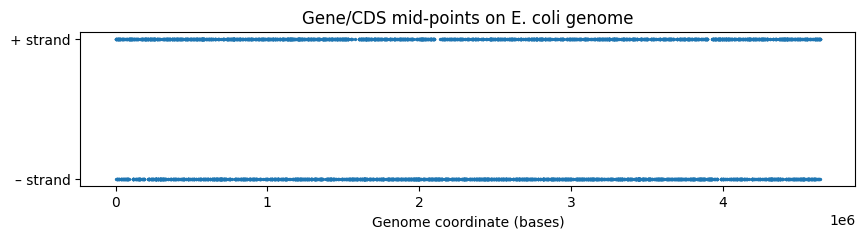

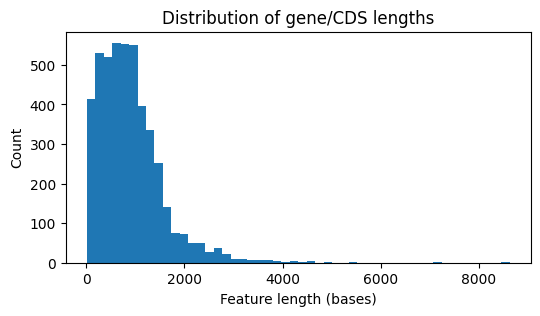

In [60]:
import matplotlib.pyplot as plt

# 1) Gather feature data
starts, strands, lengths = [], [], []
for feat in record_gb.features:
    if feat.type in ("gene"):
        start = int(feat.location.start)
        end   = int(feat.location.end)
        mid   = (start + end) / 2
        strand = 1 if feat.location.strand == 1 else 0
        starts.append(mid)
        strands.append(strand)
        lengths.append(end - start)

# 2) Scatter: genome position vs strand
plt.figure(figsize=(10,2))
plt.scatter(starts, strands, s=2)
plt.yticks([0,1], ["– strand","+ strand"])
plt.xlabel("Genome coordinate (bases)")
plt.title("Gene/CDS mid-points on E. coli genome")
plt.show()

# 3) Histogram of feature lengths
plt.figure(figsize=(6,3))
plt.hist(lengths, bins=50)
plt.xlabel("Feature length (bases)")
plt.ylabel("Count")
plt.title("Distribution of gene/CDS lengths")
plt.show()


Phase 3: Metabolic Modeling with COBRApy (Flux Balance Analysis)

---


Goals: Move from sequence data to systems-level models. Learn the basics of metabolic networks and flux balance analysis (FBA) – a way to simulate cell metabolism using linear programming​


en.wikipedia.org


. Gain hands-on experience with COBRApy, a Python package for constraint-based modeling​


In [29]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 55.4 MB/s eta 0:00:00


In [30]:
import cobra
from cobra.io import load_model
model = load_model("textbook")  # E. coli core model
solution = model.optimize()
print("Optimal growth rate:", solution.objective_value)


Optimal growth rate: 0.8739215069684279
